In [1]:
# note that this project is as entry-level as it gets and is more of an exploration of the basics of ML

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams['figure.dpi'] = 300
sns.set_theme()
sns.set_style('white')

In [2]:
housing_prices_df = pd.read_csv('./data/melb_data.csv')

# housing_prices_df.head()

housing_prices_df.dropna(axis=0, inplace = True)

In [3]:
housing_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtit

In [4]:
housing_prices_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [5]:
# YearBuilt seems to have a very low minimum that might skew results

housing_prices_df['YearBuilt'].sort_values().head(20)

9968     1196.0
2079     1830.0
4843     1850.0
5405     1850.0
5860     1850.0
2530     1854.0
5536     1856.0
8583     1860.0
11503    1860.0
5543     1860.0
9575     1863.0
4707     1863.0
8031     1872.0
4580     1875.0
10288    1875.0
5568     1877.0
11109    1880.0
6472     1880.0
5533     1880.0
9279     1880.0
Name: YearBuilt, dtype: float64

In [6]:
# it's an outlier, let's remove it

housing_prices_df = housing_prices_df[housing_prices_df['YearBuilt'] != 1196.0]

In [7]:
# selecting prediction target
y = housing_prices_df['Price']

## Analysing numerical variables

We won't be using object-type categorical variables for simplicity

In [8]:
# let's explore numerical variables first
# correlation isn't a good estimator of nonlinear relationships, but high correlation coefficients might help
# find the most important parameters
corr_matrix = housing_prices_df.corr()

# we'll assume that the correlation with an absolute value less than 0.1 is negligibly low
corr_matrix[(corr_matrix < 0.1) & (corr_matrix > - 0.1)] = 0

corr_matrix

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.533505,0.283891,0.000000,0.951793,0.613895,0.422728,0.000000,0.608221,0.000000,0.000000,0.000000,-0.111454
Price,0.533505,1.000000,-0.148900,0.125526,0.514560,0.503976,0.261569,0.000000,0.530587,-0.314491,-0.213561,0.211749,0.000000
Distance,0.283891,-0.148900,1.000000,0.405689,0.290245,0.124646,0.273445,0.000000,0.159646,0.257471,0.000000,0.221735,0.000000
Postcode,0.000000,0.125526,0.405689,1.000000,0.000000,0.109883,0.000000,0.000000,0.000000,0.000000,-0.425135,0.471266,0.000000
Bedroom2,0.951793,0.514560,0.290245,0.000000,1.000000,0.617798,0.425918,0.000000,0.593009,0.000000,0.000000,0.000000,-0.109440
Bathroom,0.613895,0.503976,0.124646,0.109883,0.617798,1.000000,0.341355,0.000000,0.534421,0.160546,0.000000,0.116298,0.000000
Car,0.422728,0.261569,0.273445,0.000000,0.425918,0.341355,1.000000,0.117556,0.334582,0.121315,0.000000,0.000000,0.000000
Landsize,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117556,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BuildingArea,0.608221,0.530587,0.159646,0.000000,0.593009,0.534421,0.334582,0.000000,1.000000,0.000000,0.000000,0.103686,0.000000
YearBuilt,0.000000,-0.314491,0.257471,0.000000,0.000000,0.160546,0.121315,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


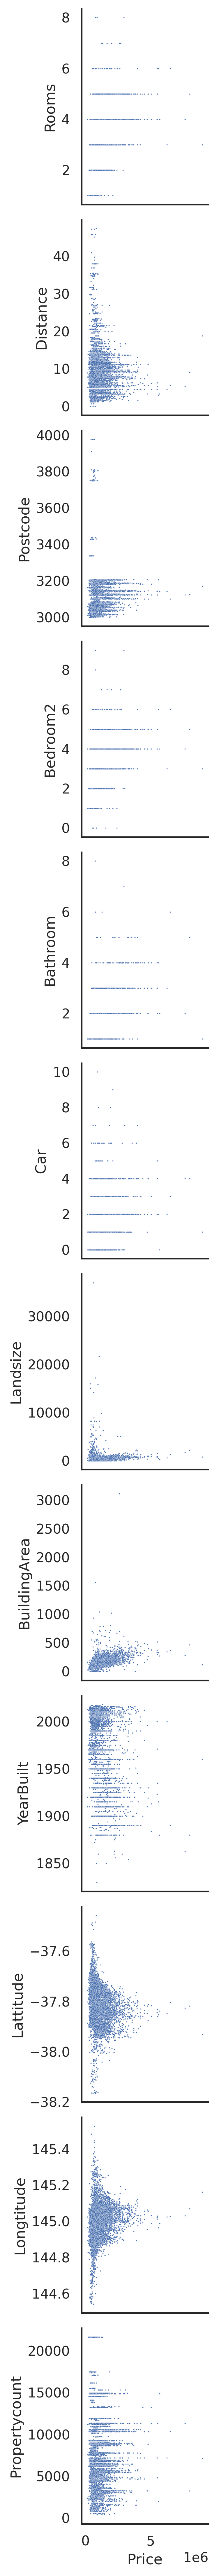

In [9]:
# first we'll take a look at scatters of price against every numerical variable to see if we can notice patterns

num_vars = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

sns.pairplot(data = housing_prices_df,
             x_vars = ['Price'],
             y_vars = num_vars,
             plot_kws = {'s': 1})

A higher number of rooms seems to generally make property more expensive, although that trend isn't noticeable 
for housing with over 5 rooms. It may be contributed to underrepresentation.

Housing with lower distance values seems to generally be valued higher.

Postcode is an indicator of the general area of the housing, and it seems like housing with postcodes between
3000 and 3200 is valued higher.

More bedrooms generally make housing more expensive. Low prices for 6-10 can, again, be attributed to underrepresentation.

The same pattern is noticed for bathrooms.

For cars it's hard to say anything specific, but the number between 2 and 4 seems to be valued higher on average.

Lower landsizes can be valued higher, but, again, landsizes above roughly 3000 are low in number.

BuildingArea exhibits what seems like an almost linear relationship with price.

YearBuilt doesn't seem to affect price much, but most cheap housing was built fairly recently.

Expensive housing is only encountered at (lat, lon) close to (-37.8, 145.0).

Propertycount doesn't seem to have a relationship with price.


We can examine the price means for numerical variables that can be perceived as categorical.

              Price        
               mean     len
Rooms                      
1      4.112044e+05   329.0
2      7.258893e+05  1730.0
3      1.067388e+06  2540.0
4      1.481903e+06  1278.0
5      1.960689e+06   281.0
6      2.076393e+06    28.0
7      1.908667e+06     6.0
8      1.533667e+06     3.0


<AxesSubplot:xlabel='Rooms', ylabel="('Price', 'mean')">

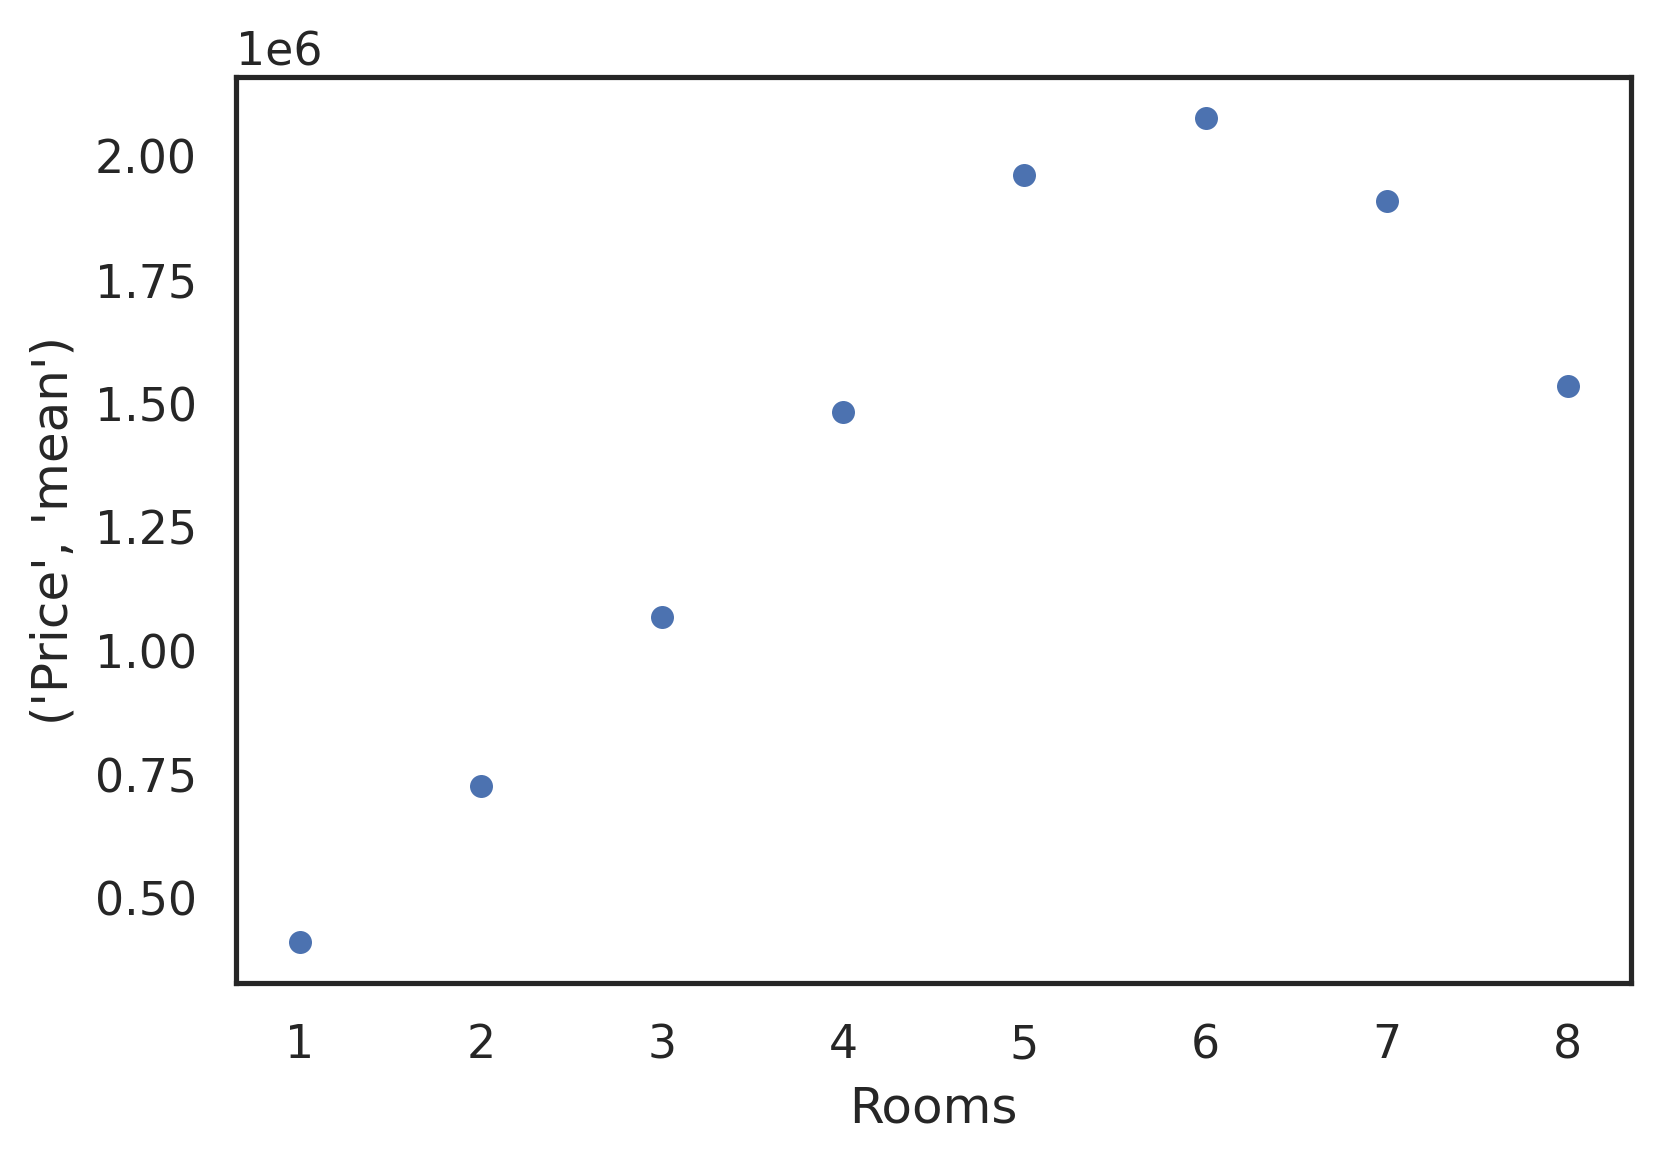

In [10]:
mean_prices_rooms = housing_prices_df[['Price', 'Rooms']].groupby('Rooms').agg(['mean', len])

print(mean_prices_rooms)

sns.scatterplot(data = mean_prices_rooms.reset_index(),
         y = ('Price', 'mean'), x = 'Rooms')

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

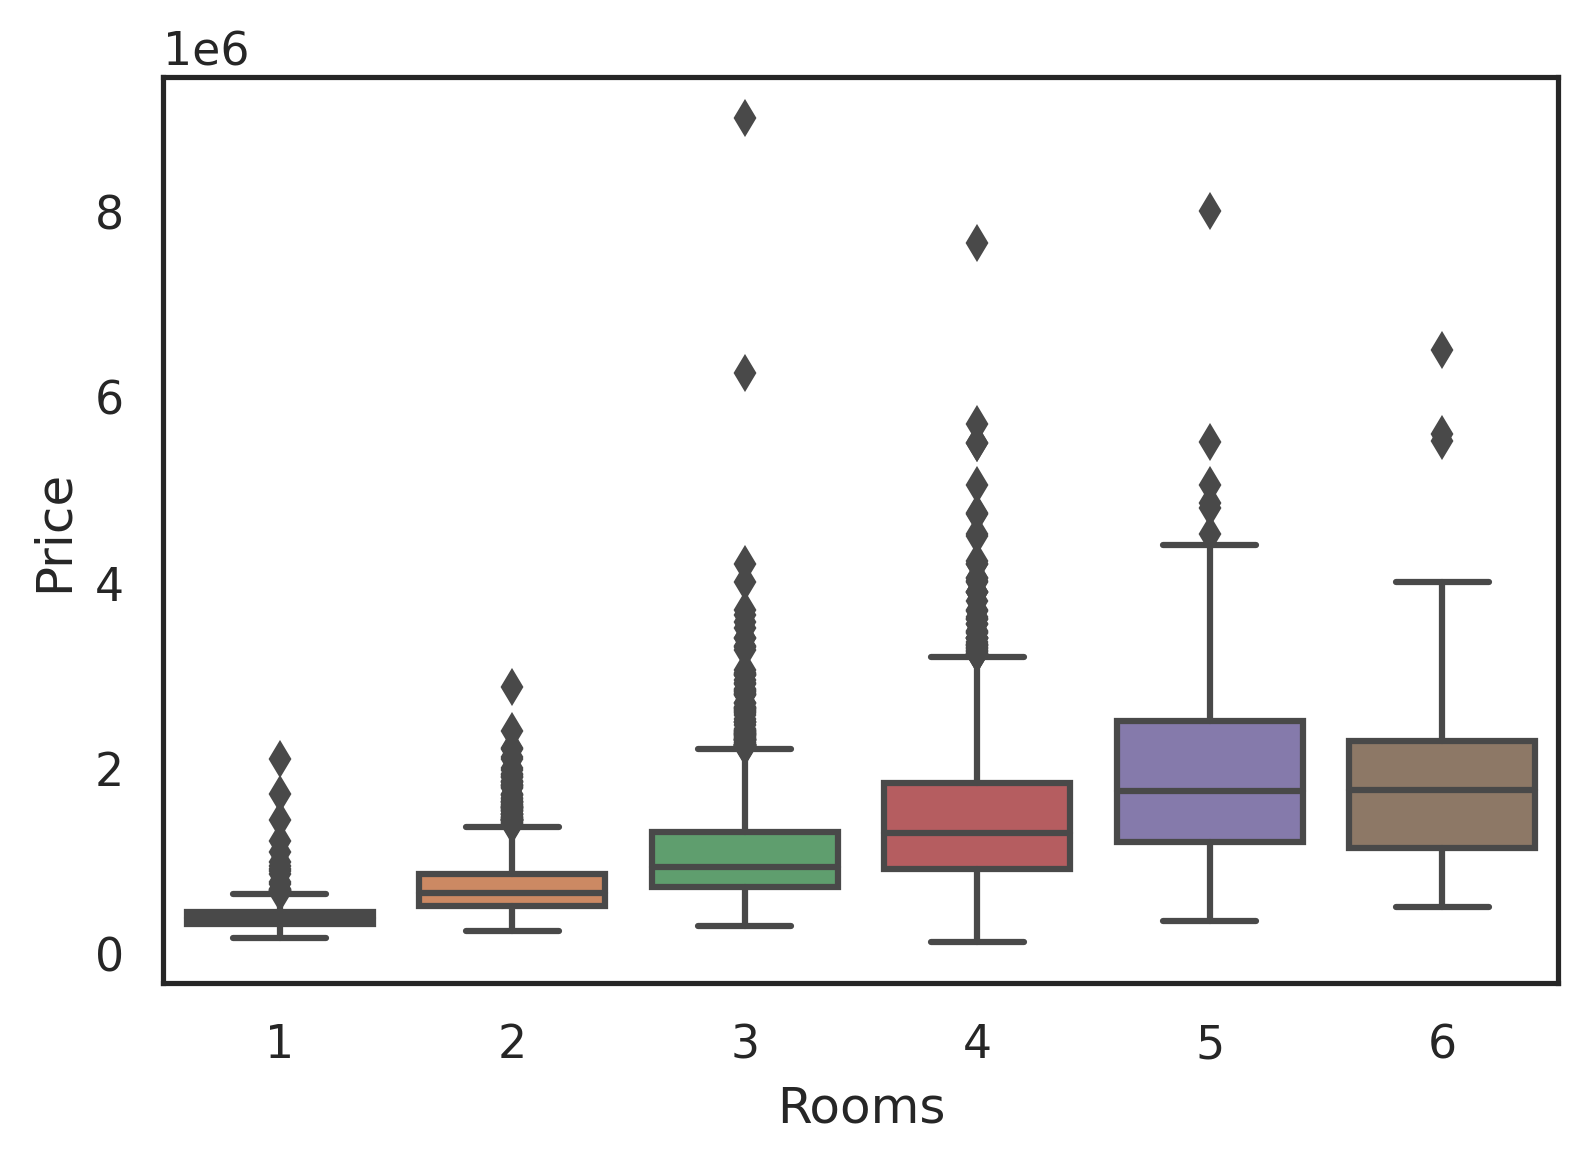

In [11]:
# because of low counts we can't be certain about representativity of price range for 7-8 room houses
# let's remove them

housing_prices_df = housing_prices_df[housing_prices_df['Rooms'] <= 6]

sns.boxplot(data = housing_prices_df,
            x = 'Rooms', y = 'Price')

                 Price        
                  mean     len
Bedroom2                      
0.0       1.182000e+06     5.0
1.0       4.221220e+05   338.0
2.0       7.407304e+05  1783.0
3.0       1.078040e+06  2548.0
4.0       1.500394e+06  1225.0
5.0       1.911745e+06   259.0
6.0       2.092923e+06    26.0
9.0       7.555000e+05     2.0


<AxesSubplot:xlabel='Bedroom2', ylabel="('Price', 'mean')">

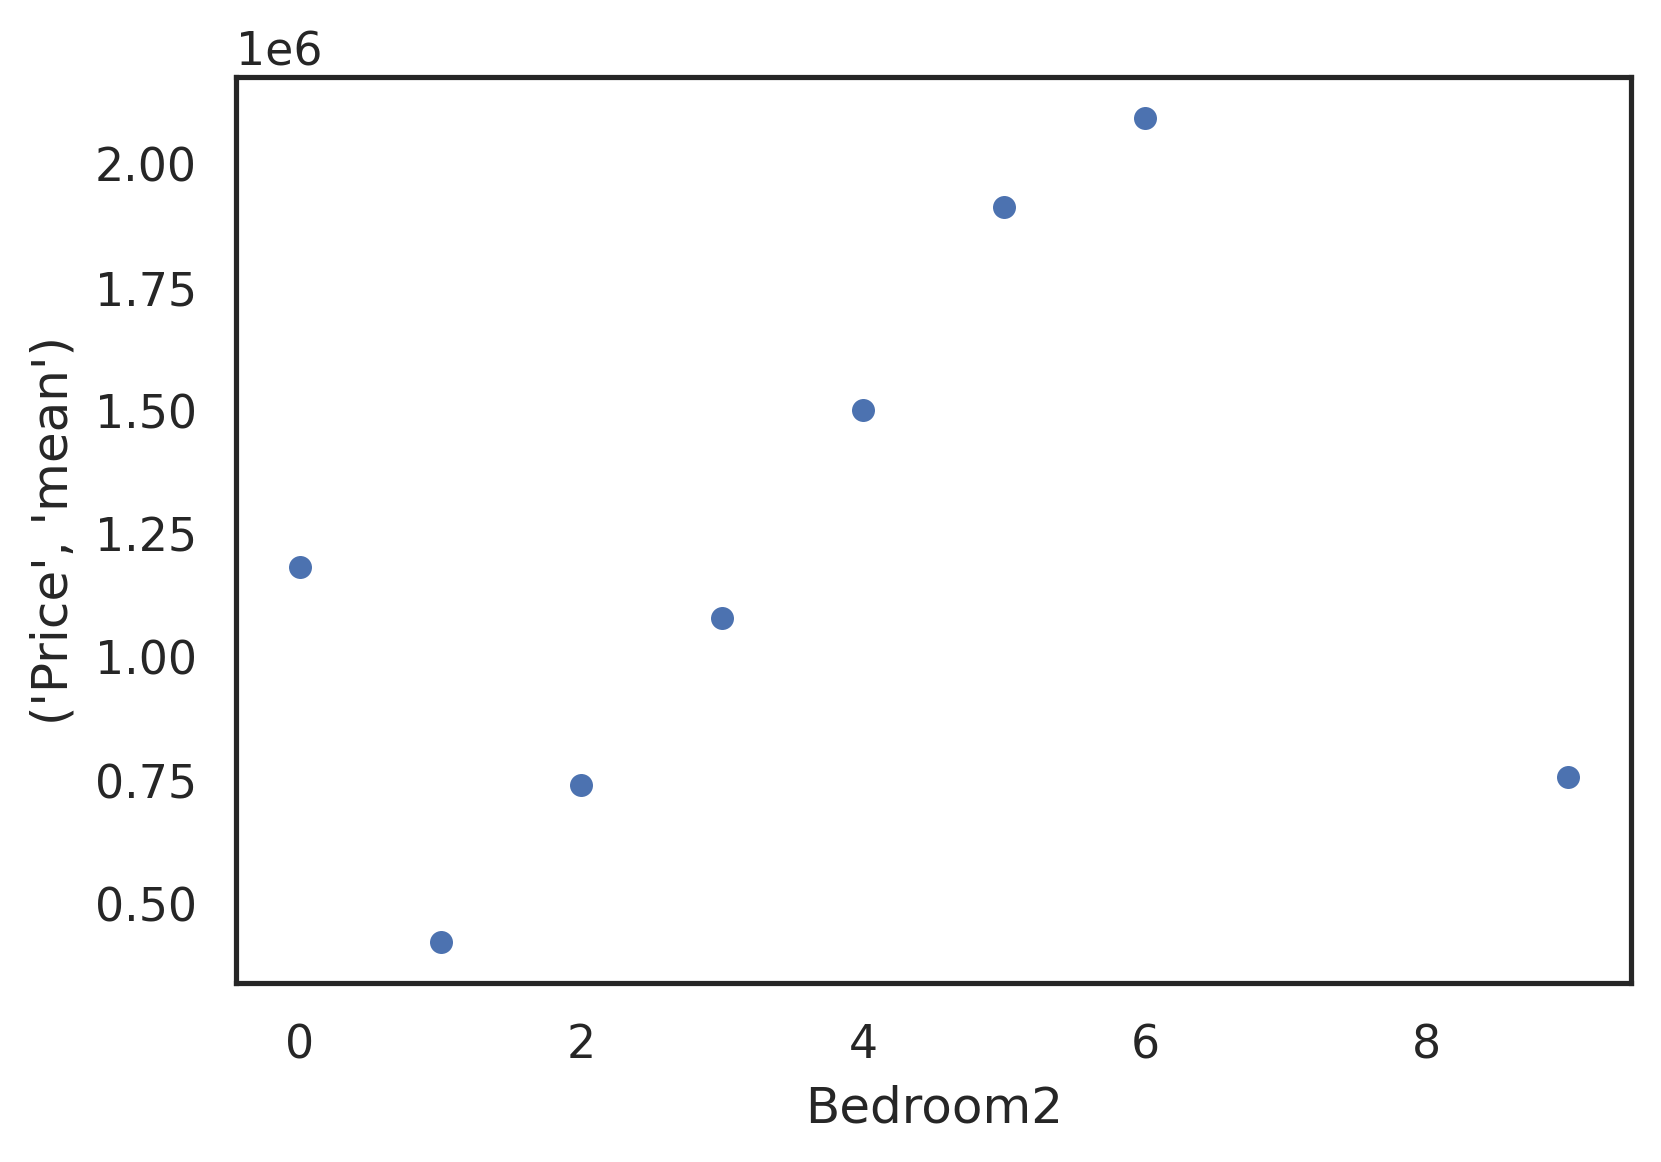

In [12]:
# room-to-price relationship seems very pronounced

mean_prices_bedroom = housing_prices_df[['Price', 'Bedroom2']].groupby('Bedroom2').agg(['mean', len])

print(mean_prices_bedroom)

sns.scatterplot(data = mean_prices_bedroom.reset_index(),
         y = ('Price', 'mean'), x = 'Bedroom2')

<AxesSubplot:xlabel='Bedroom2', ylabel='Price'>

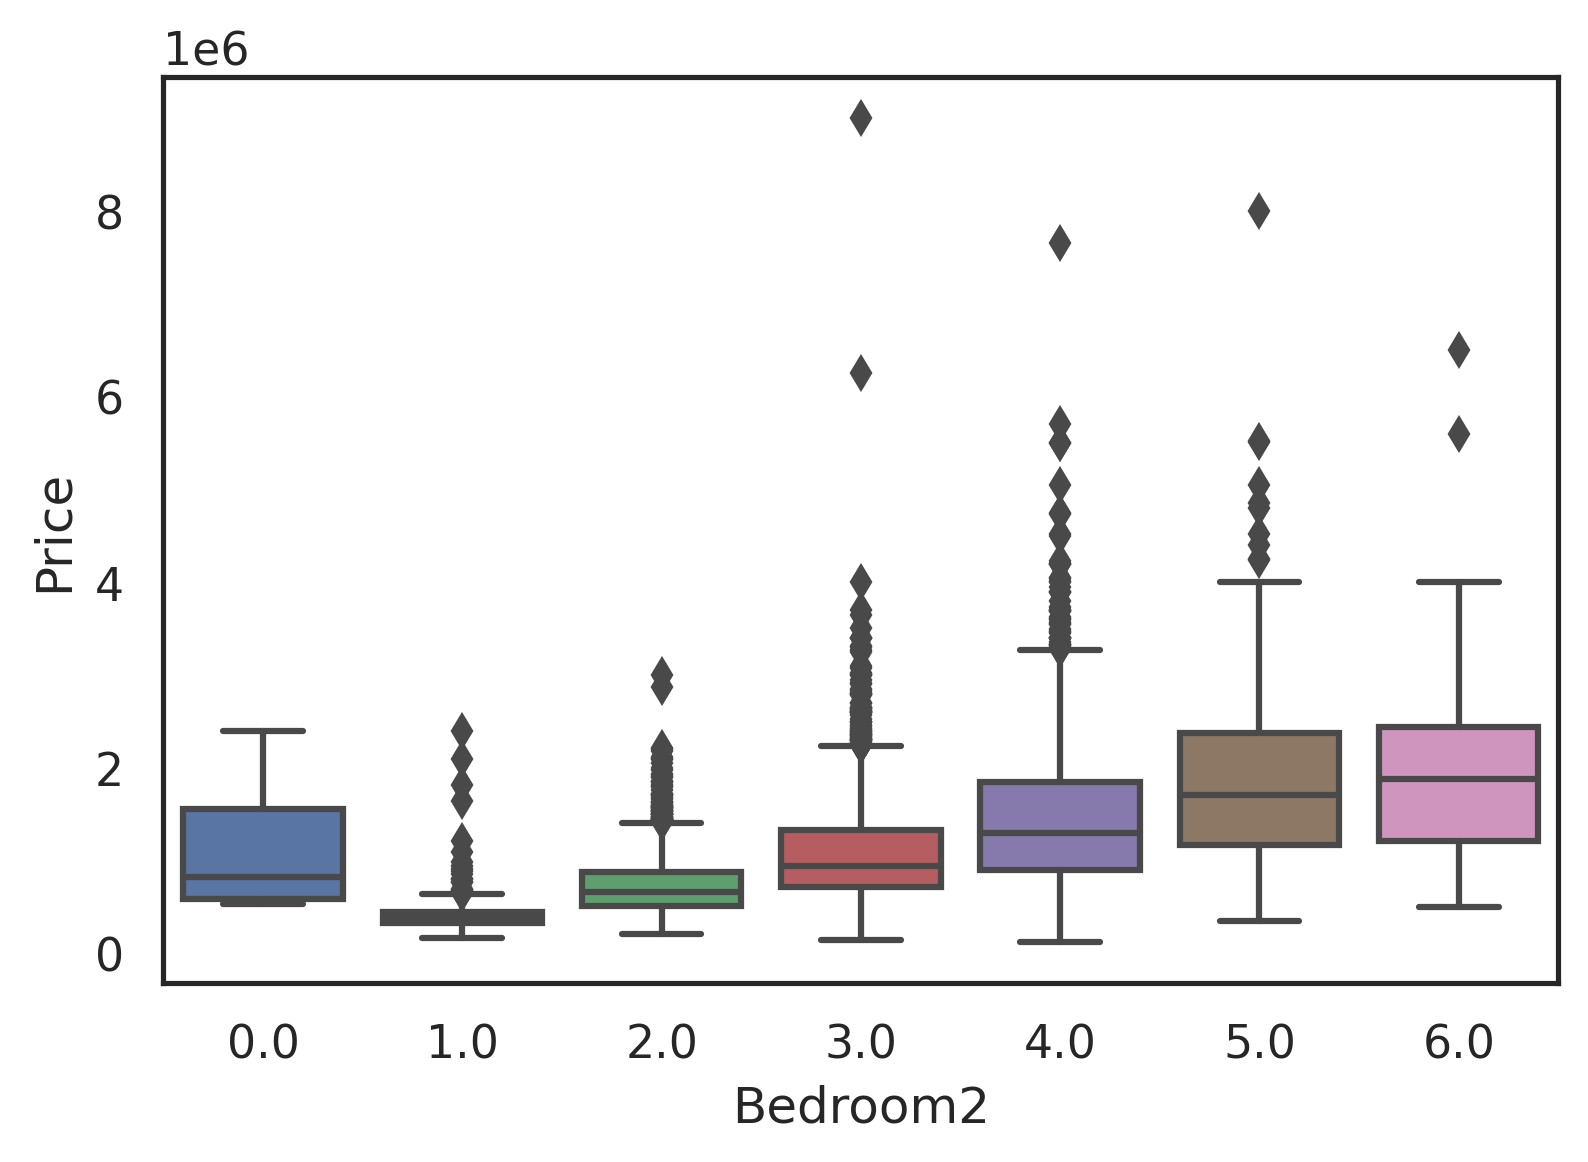

In [13]:
# 7-9 room houses are very low in number, may be biased

housing_prices_df = housing_prices_df[housing_prices_df['Bedroom2'] <= 6]

sns.boxplot(data = housing_prices_df,
            x = 'Bedroom2', y = 'Price')

In [14]:
# this also seems to be a relevant parameter

                 Price        
                  mean     len
Bathroom                      
1.0       8.133405e+05  3283.0
2.0       1.220437e+06  2362.0
3.0       1.795616e+06   460.0
4.0       2.841142e+06    62.0
5.0       2.728767e+06    15.0
6.0       3.880000e+06     2.0


<AxesSubplot:xlabel='Bathroom', ylabel="('Price', 'mean')">

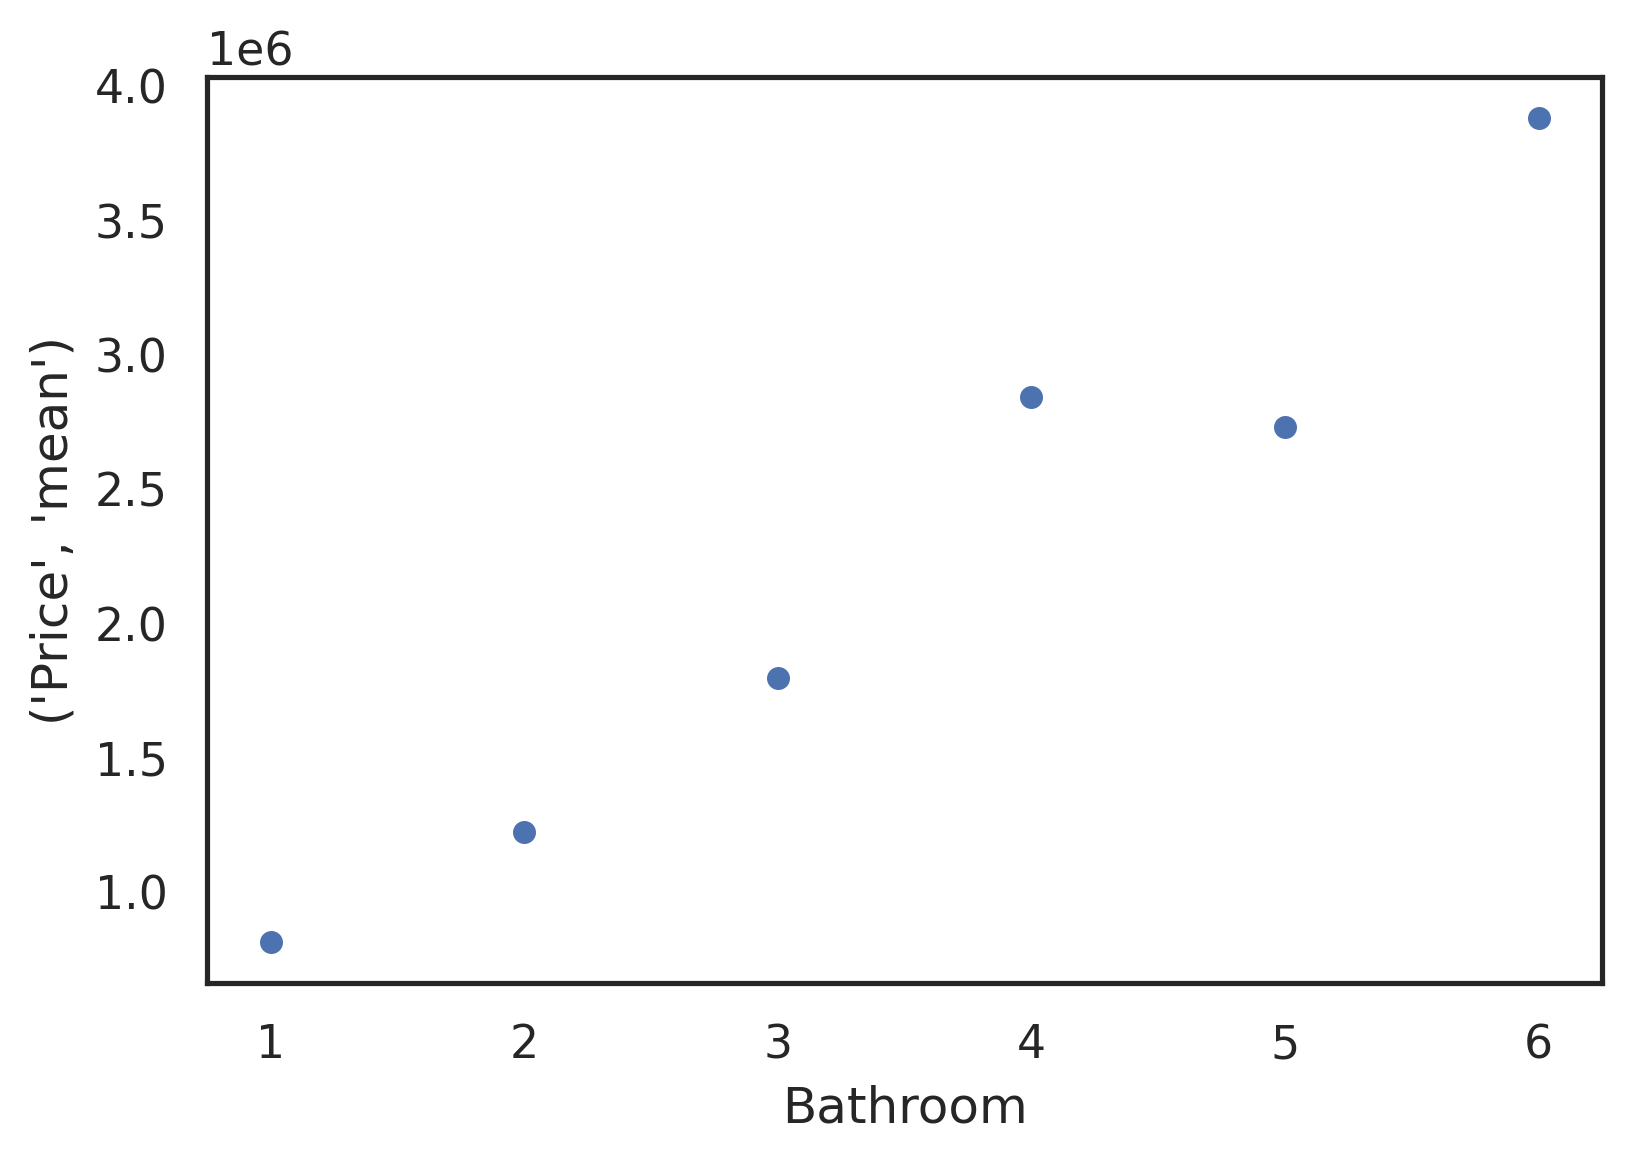

In [15]:
mean_prices_bathroom = housing_prices_df[['Price', 'Bathroom']].groupby('Bathroom').agg(['mean', len])

print(mean_prices_bathroom)

sns.scatterplot(data = mean_prices_bathroom.reset_index(),
         y = ('Price', 'mean'), x = 'Bathroom')

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

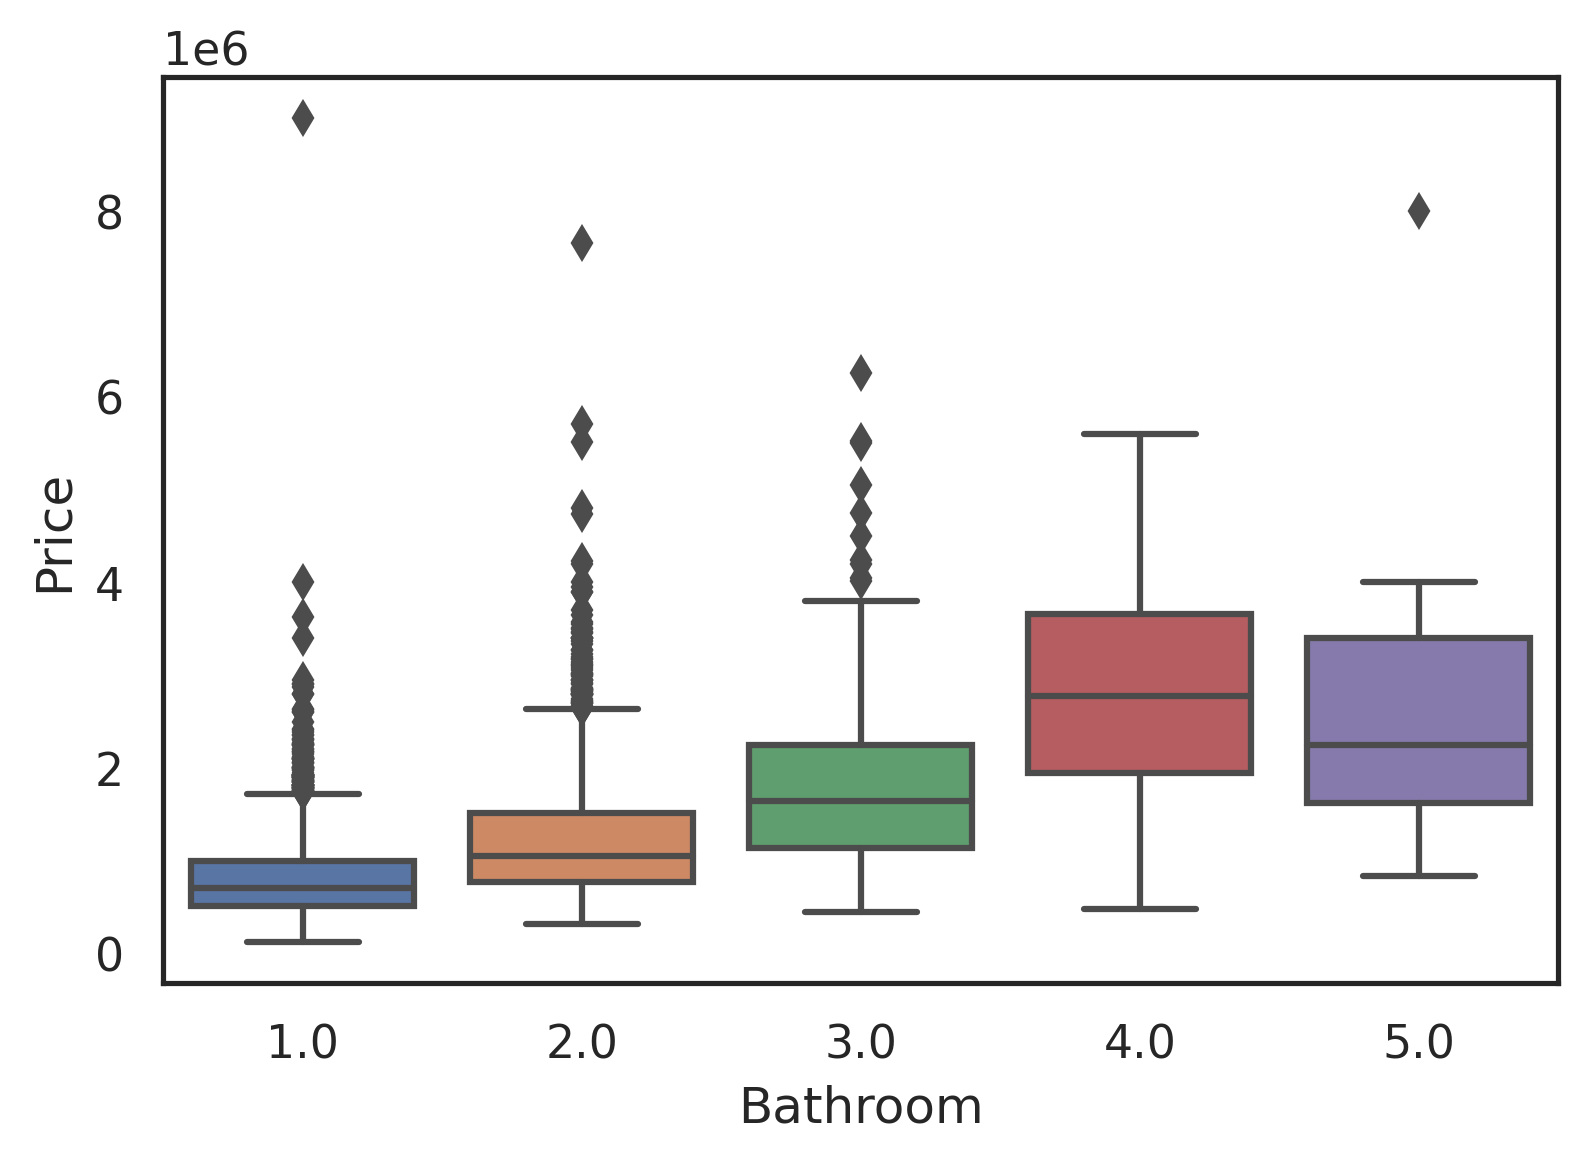

In [16]:
# same issue here

housing_prices_df = housing_prices_df[housing_prices_df['Bathroom'] <= 5]

sns.boxplot(data = housing_prices_df,
            x = 'Bathroom', y = 'Price')

             Price        
              mean     len
Car                       
0.0   1.094771e+06   431.0
1.0   8.283691e+05  2723.0
2.0   1.241461e+06  2465.0
3.0   1.368159e+06   301.0
4.0   1.514342e+06   207.0
5.0   1.425442e+06    26.0
6.0   1.456500e+06    21.0
7.0   2.345000e+06     4.0
8.0   1.450000e+06     2.0
9.0   2.100000e+06     1.0
10.0  9.250000e+05     1.0


<AxesSubplot:xlabel='Car', ylabel="('Price', 'mean')">

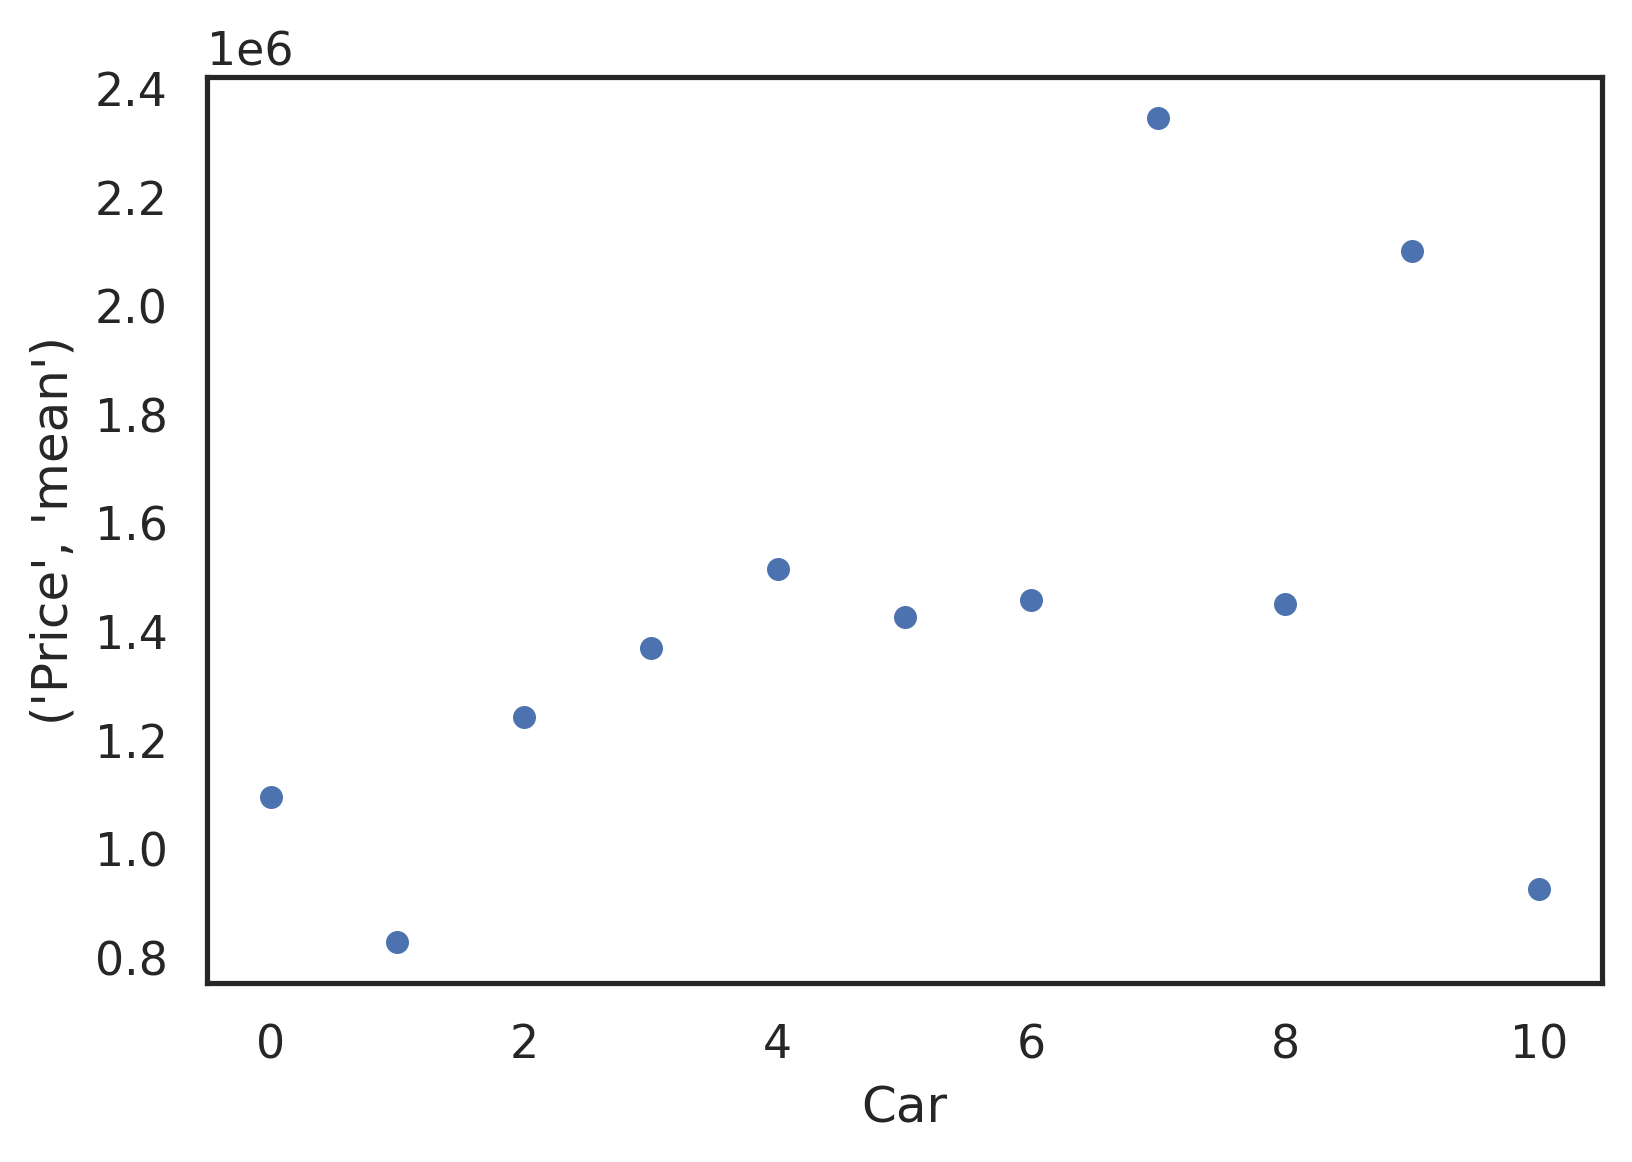

In [17]:
# again, underrepresentation may be introducing bias for 7 and 8, but an overall relationship is obvious
# and the last one, Car

mean_prices_car = housing_prices_df[['Price', 'Car']].groupby('Car').agg(['mean', len])

print(mean_prices_car)

sns.scatterplot(data = mean_prices_car.reset_index(),
         y = ('Price', 'mean'), x = 'Car')

<AxesSubplot:xlabel='Car', ylabel='Price'>

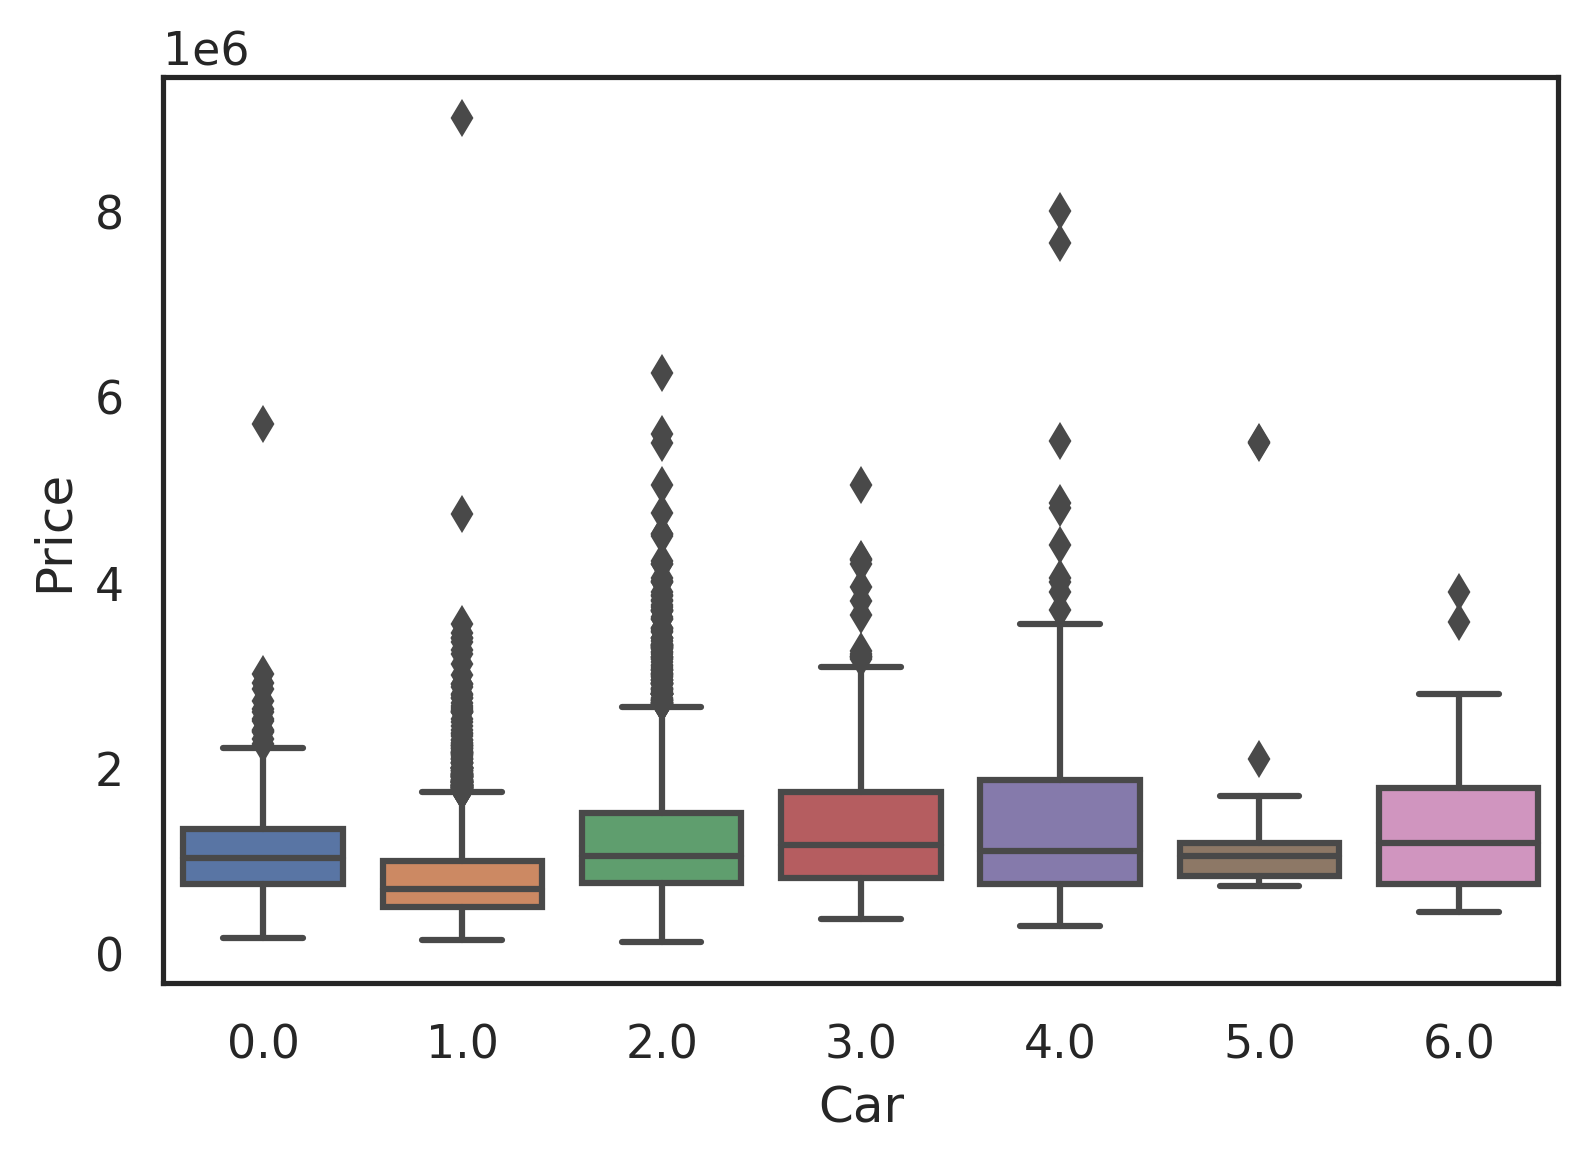

In [18]:
# 7+ are very low in count, again

housing_prices_df = housing_prices_df[housing_prices_df['Car'] <= 6]

sns.boxplot(data = housing_prices_df,
            x = 'Car', y = 'Price')

In [19]:
# relatioship between car and price seems to exist, but its nature isn't immediately obvious

<AxesSubplot:>

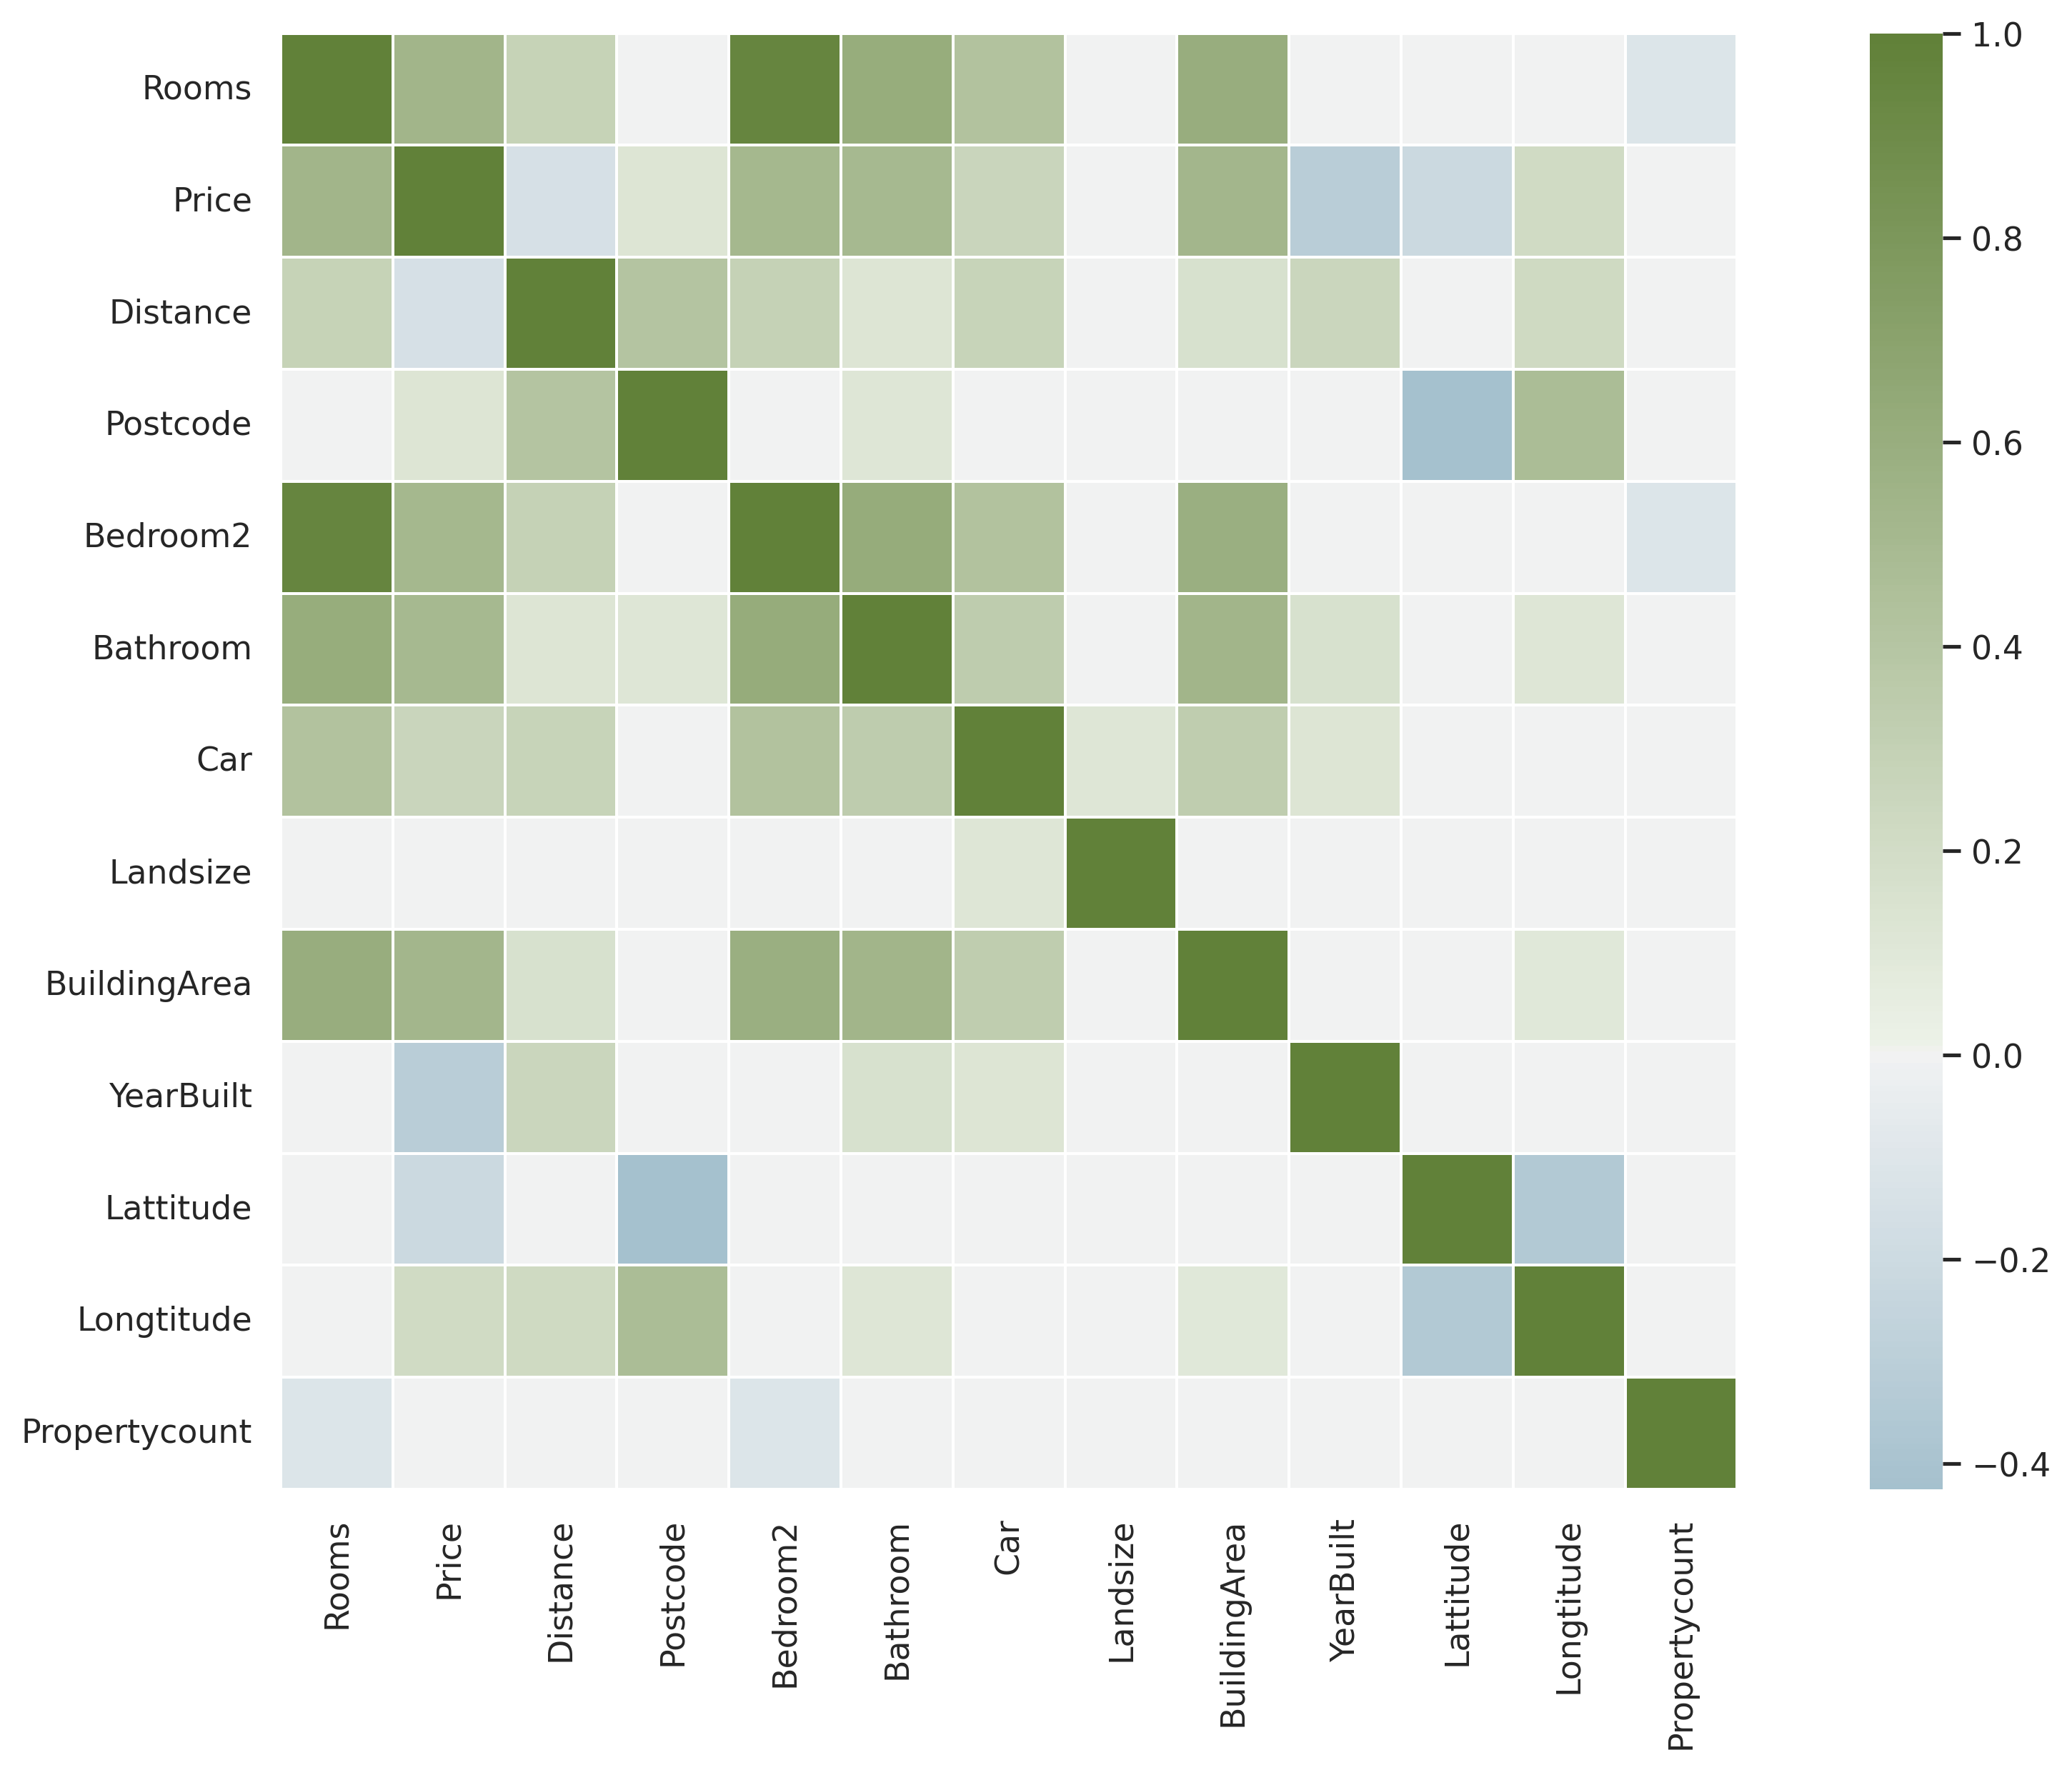

In [20]:
# let's examine how correlated different numerical features are

fig, ax = plt.subplots(figsize = (16, 9))

cmap = sns.diverging_palette(230, 110, as_cmap = True)

sns.heatmap(data = corr_matrix, cmap = cmap, center = 0,
            square = True, linewidths = .5)

In [21]:
# let's additionally examine the magnitudes of correlation coefficients

corr_matrix['Price']

Rooms            0.533505
Price            1.000000
Distance        -0.148900
Postcode         0.125526
Bedroom2         0.514560
Bathroom         0.503976
Car              0.261569
Landsize         0.000000
BuildingArea     0.530587
YearBuilt       -0.314491
Lattitude       -0.213561
Longtitude       0.211749
Propertycount    0.000000
Name: Price, dtype: float64

In [36]:
# Rooms, BuildingArea, Bedroom2, and Bathroom have the strongest correlation with price
# note that Bedroom2 correlates strongly with Rooms

# YearBuilt is correlated slightly weaker, but still seems significant
# people generally value older housing more

# Car, Lattitude, and Longtitude correlate with Price relatively weakly

# Distance and Postcode seem to have a negligibly weak correlation

num_vars = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 
            'YearBuilt', 'Lattitude', 'Longtitude', 'BuildingArea',
            'Postcode', 'Propertycount', 'Landsize']

num_cands_for_exclusion = [
    'YearBuilt', # correlation exists, but relationship wasn't noticeable on scatter inspection
    'Postcode', # weak correlation
    'Propertycount', # weak correlation AND a hardly noticeable relationship on scatter
    'Car', # hardly noticeable relationship on box
    'Landsize', # weak correlation
    'Distance', # weak correlation AND prevalence of cheap housing even at low
]

most_relevant = [i for i in num_vars if i not in num_cands_for_exclusion]
most_relevant

['Rooms', 'Bedroom2', 'Bathroom', 'Lattitude', 'Longtitude', 'BuildingArea']

In [37]:
# we'll try out modelling with and without exclusion candidates

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

y = housing_prices_df['Price']

In [38]:
# with all

temp_maes = []
    
for rand_state in range(0, 10):
    housing_model = RandomForestRegressor(random_state = rand_state)
    X = housing_prices_df[num_vars]

    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = rand_state)

    housing_model.fit(train_X, train_y)
    val_predictions = housing_model.predict(val_X)
    val_mae = mean_absolute_error(val_predictions, val_y)
    
    temp_maes.append(val_mae)

val_mae

182182.4763428325

In [39]:
# without any: it will serve as a benchmark

temp_maes = []
    
for rand_state in range(0, 10):
    housing_model = RandomForestRegressor(random_state = rand_state)
    X = housing_prices_df[most_relevant]

    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = rand_state)

    housing_model.fit(train_X, train_y)
    val_predictions = housing_model.predict(val_X)
    val_mae = mean_absolute_error(val_predictions, val_y)

    temp_maes.append(val_mae)

none_val_mae = sum(temp_maes) / len(temp_maes)
none_val_mae

205383.96393188176

In [40]:
[i for i in num_vars if i not in most_relevant]

['Distance', 'Car', 'YearBuilt', 'Postcode', 'Propertycount', 'Landsize']

In [41]:
# it's definitely worse. Let's try adding features one by one and see how much the prediction accuracy changes

curr_best_mae = none_val_mae

for variable in num_cands_for_exclusion:
    temp_maes = []
    
    for rand_state in range(0, 10):
        housing_model = RandomForestRegressor(random_state = rand_state)
        X = housing_prices_df[most_relevant + [variable]]

        train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = rand_state)

        housing_model.fit(train_X, train_y)
        val_predictions = housing_model.predict(val_X)
        val_mae = mean_absolute_error(val_predictions, val_y)

        temp_maes.append(val_mae)
        
    curr_mae = sum(temp_maes) / len(temp_maes)
    
    if curr_mae < curr_best_mae:
        curr_best_mae = curr_mae
        most_relevant.append(variable)
        
print(most_relevant, curr_best_mae)

['Rooms', 'Bedroom2', 'Bathroom', 'Lattitude', 'Longtitude', 'BuildingArea', 'YearBuilt', 'Postcode', 'Car', 'Landsize', 'Distance'] 168061.67601532815


In [42]:
[i for i in num_vars if i not in most_relevant]

['Propertycount']

In [43]:
mean_accuracy_increase = (val_mae - curr_best_mae) / val_mae

mean_accuracy_increase

0.0770206786684968

In [ ]:
# 7% is still something, right?